# valentin

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("global_power_plant_database.csv")

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_all = df.drop(['country_long', 'name', 'url', 'geolocation_source', 'wepp_id'], axis=1)

If column `gppd_idnr` is unique, we can set it as index:

In [5]:
df_all['gppd_idnr'].is_unique

True

In [6]:
df_all.set_index('gppd_idnr')

,country,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
gppd_idnr,,,,,,,,,,,,,,,,,,
GEODB0040538,AFG,33.00,32.3220,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
GEODB0040541,AFG,66.00,34.5560,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
GEODB0040534,AFG,100.00,34.6410,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
GEODB0040536,AFG,11.55,34.4847,70.3633,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
GEODB0040540,AFG,42.00,34.5638,69.1134,Gas,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRI1022386,ZMB,50.00,-12.9667,28.6333,Oil,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,NaN,NaN,NaN,NaN,NaN,NaN,120.872642
WRI1022384,ZMB,20.00,-12.8167,28.2000,Oil,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,NaN,NaN,NaN,NaN,NaN,NaN,48.349057
WRI1022380,ZMB,108.00,-17.9167,25.8500,Hydro,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,NaN,NaN,NaN,NaN,NaN,NaN,702.100000


In [7]:
#Split into one dataset containing estimated and one containing time series data
df_time_series = (df_all.dropna(how='all', subset=['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'])
                      .set_index('gppd_idnr'))


df_time_series_complete = df_time_series.dropna(how='any', subset=['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'])

df_time_series_incomplete = df_time_series[df_time_series[['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']].isnull().any(axis=1)]

df_estimate = (df_all.dropna(how='any', subset=['estimated_generation_gwh'])
                   .set_index('gppd_idnr'))

In [8]:
#We must have some duplicates
len(df_time_series_incomplete)+len(df_estimate)+len(df_time_series_complete)

31814

In [9]:
#Some rows have both estimate and incomplete time series:
s1 = pd.merge(df_time_series_incomplete, df_estimate, how='inner')
s1

,country,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AUS,50.0,-34.5034,139.0246,Oil,NaN,NaN,NaN,NaN,Infratil Energy Australia Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,1.653056,5.300833,7.649722,526.452790
1,AUS,37.0,-23.5525,145.3142,Gas,NaN,NaN,NaN,NaN,Ergon Energy Qld Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,3.941667,93.304739
2,AUS,113.0,-36.5817,149.1083,Wind,NaN,NaN,NaN,NaN,Boco Rock Wind Farm Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,208.778611,334.114167,349.301667,94.893070
3,AUS,53.0,-31.9867,141.3915,Solar,NaN,NaN,NaN,NaN,AGL Energy,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,92.104722,127.564722,1059.946475
4,AUS,190.0,-20.5447,147.8049,Coal,NaN,NaN,NaN,NaN,RATCH Australia,Australian Renewable Energy Mapping Infrastruc...,NaN,0.214722,NaN,NaN,NaN,NaN,771.660922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,VNM,66.0,14.3656,108.6943,Hydro,NaN,NaN,NaN,2001.0,Vinh Son- Song Hinh Hydropower JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,228.500000,NaN,230.679596
2526,VNM,28.0,14.3611,108.7203,Hydro,NaN,NaN,NaN,2014.0,Vinh Son Hydropower Investment JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,103.000000,NaN,97.864071
2527,VNM,6.6,21.3412,104.3498,Hydro,NaN,NaN,NaN,NaN,Xim Vang Hydro Power JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,68.000000,NaN,23.067960
2528,VNM,19.5,12.1526,108.3787,Hydro,NaN,NaN,NaN,2010.0,Cao Nguyen - Song Da Hydro Power JSC.,Open Development Vietnam,NaN,NaN,NaN,NaN,79.000000,NaN,68.155335


In [10]:
df_time_series_incomplete

,country,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
gppd_idnr,,,,,,,,,,,,,,,,,,
AUS0000232,AUS,50.0,-34.5034,139.0246,Oil,NaN,NaN,NaN,NaN,Infratil Energy Australia Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,1.653056,5.300833,7.649722,526.452790
AUS0000114,AUS,165.0,-38.3861,144.1828,Coal,NaN,NaN,NaN,NaN,Alcoa of Australia Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,1095.676944,1239.962778,1260.261111,167.880000,NaN,NaN
AUS0000008,AUS,37.0,-23.5525,145.3142,Gas,NaN,NaN,NaN,NaN,Ergon Energy Qld Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,3.941667,93.304739
AUS0000027,AUS,9.9,-33.6219,149.1982,Wind,NaN,NaN,NaN,NaN,Eraring Energy,Australian Renewable Energy Mapping Infrastruc...,NaN,15.761667,18.213611,20.082222,18.890833,NaN,NaN
AUS0000394,AUS,113.0,-36.5817,149.1083,Wind,NaN,NaN,NaN,NaN,Boco Rock Wind Farm Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,208.778611,334.114167,349.301667,94.893070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRI1030837,VNM,66.0,14.3656,108.6943,Hydro,NaN,NaN,NaN,2001.0,Vinh Son- Song Hinh Hydropower JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,228.500000,NaN,230.679596
WRI1030836,VNM,28.0,14.3611,108.7203,Hydro,NaN,NaN,NaN,2014.0,Vinh Son Hydropower Investment JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,103.000000,NaN,97.864071
WRI1030888,VNM,6.6,21.3412,104.3498,Hydro,NaN,NaN,NaN,NaN,Xim Vang Hydro Power JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,68.000000,NaN,23.067960


# karina - plots for all data

## 1. Plot distribution of capacity for each fuel type

In [11]:
# Group by the fuel type
fueltype = df_all.groupby("primary_fuel")
fueltype.describe()

capacity_mw                                             \
                     count         mean          std   min        25%   
primary_fuel                                                            
Biomass             1396.0    24.667408    39.970655   1.0     3.0000   
Coal                2390.0   836.619247   883.792022   1.2   200.0000   
Cogeneration          41.0    97.624390   283.717419   1.6     7.5000   
Gas                 3922.0   375.495683   562.794664   1.0    31.1250   
Geothermal           189.0    66.473810   114.770905   1.0    18.0000   
Hydro               7155.0   146.804321   549.433962   1.0     5.3000   
Nuclear              198.0  2069.832626  1304.270269  20.0  1100.0000   
Oil                 2290.0   114.565943   394.966198   1.0     2.5404   
Other                 44.0    85.399091   144.155122   4.5    17.5000   
Petcoke               13.0   192.082885   458.141449   4.7    27.3000   
Solar               5929.0    10.747651    26.418461   1.0     2.0000   
Storage               58.0     7.820690     9.682517   1.0     2.0000   
Waste               1087.0    13.898081    20.690791   1.0     2.3000   
Wave and Tidal        10.0    55.220000   101.440708   1.0     1.4000   
Wind                5188.0    46.299842   102.712898   1.0    10.0000   

                                            latitude             ...  \
                    50%       75%       max    count       mean  ...   
primary_fuel                                                     ...   
Biomass            9.95    29.175    528.00   1396.0  19.364704  ...   
Coal             600.00  1200.000   7000.00   2390.0  32.725796  ...   
Cogeneration      30.00    49.300   1404.00     41.0  38.124766  ...   
Gas              152.25   530.000   8865.00   3922.0  31.662952  ...   
Geothermal        30.00    77.000   1163.00    189.0  29.557186  ...   
Hydro             20.00    93.000  22500.00   7155.0  30.309767  ...   
Nuclear         1883.40  2665.025   8212.00    198.0  38.597543  ...   
Oil                9.20    50.000   6794.00   2290.0  14.116997  ...   
Other             40.00    98.625    845.26     44.0  38.899089  ...   
Petcoke           67.00   122.900   1707.30     13.0  31.472562  ...   
Solar              4.70     9.000    648.00   5929.0  40.678147  ...   
Storage            2.90    10.000     40.00     58.0  39.166022  ...   
Waste              4.90    15.250    160.90   1087.0  39.106433  ...   
Wave and Tidal     5.00    22.250    254.00     10.0  52.995930  ...   
Wind              26.00    49.000   6000.00   5188.0  36.618024  ...   

               generation_gwh_2017               estimated_generation_gwh  \
                               75%           max                    count   
primary_fuel                                                                
Biomass                 338.506503    831.165002                   1241.0   
Coal                   6262.190992  35116.000000                   1846.0   
Cogeneration            166.049000    564.213000                     11.0   
Gas                     530.573000  20515.369720                   2115.0   
Geothermal              303.664250   4667.659000                    127.0   
Hydro                   158.727375  20983.990000                   5438.0   
Nuclear               17592.001000  32340.138000                    128.0   
Oil                       0.732500   6972.247003                   1442.0   
Other                   128.024499    508.701000                     28.0   
Petcoke                 297.125749   5776.007940                      1.0   
Solar                     9.928000   1237.532000                   4567.0   
Storage                   0.056000     34.300000                      0.0   
Waste                    99.123750    928.862008                    538.0   
Wave and Tidal                 NaN           NaN                      0.0   
Wind                    374.916500   1972.964000                   4309.0   

                

In [12]:
# https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb
capacity = fueltype.agg(**{'capacity_sum': pd.NamedAgg(column='capacity_mw', aggfunc='sum')})
capacity = capacity.sort_values(by='capacity_sum', ascending = False)
capacity

,capacity_sum
primary_fuel,
Coal,1.999520e+06
Gas,1.472694e+06
Hydro,1.050385e+06
Nuclear,4.098269e+05
Oil,2.623560e+05
Wind,2.402036e+05
Solar,6.372282e+04
Biomass,3.443570e+04
Waste,1.510721e+04


In [13]:
# https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
green = ['not green','not green','green','green','not green','green','green','green','green','green','other','other','not green','green','other']
capacity['green'] = green
capacity = capacity.reset_index()
capacity

,primary_fuel,capacity_sum,green
0,Coal,1.999520e+06,not green
1,Gas,1.472694e+06,not green
2,Hydro,1.050385e+06,green
3,Nuclear,4.098269e+05,green
4,Oil,2.623560e+05,not green
5,Wind,2.402036e+05,green
6,Solar,6.372282e+04,green
7,Biomass,3.443570e+04,green
8,Waste,1.510721e+04,green
9,Geothermal,1.256355e+04,green


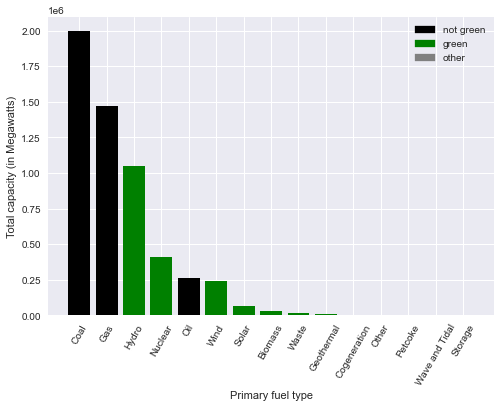

In [98]:
# https://stackoverflow.com/questions/57340415/matplotlib-bar-plot-add-legend-from-categories-dataframe-column
import matplotlib.pyplot as plt
plt.style.use('seaborn')
colors = {'not green':"black", 'green':"green", 'other':"grey"}  
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
c = capacity['green'].apply(lambda x: colors[x])
plt.bar(capacity['primary_fuel'], capacity['capacity_sum'], color=c, label=colors)
plt.xticks(rotation = 60)
plt.xlabel("Primary fuel type")
plt.ylabel("Total capacity (in Megawatts)", rotation = 90)
plt.legend(handles, labels)

## 2. How many new powerplants in total and of each new fuel type per year (or per n years)

In [15]:
# https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
newpp = df_all[['gppd_idnr','country','primary_fuel','commissioning_year']]
newpp = newpp.dropna()
newpp

,gppd_idnr,country,primary_fuel,commissioning_year
7,WRI1002169,ALB,Hydro,1965.0
8,WRI1002170,ALB,Hydro,1978.0
9,WRI1002171,ALB,Hydro,1985.0
10,WRI1002172,ALB,Hydro,1951.0
11,WRI1002173,ALB,Hydro,1963.0
...,...,...,...,...
29892,WRI1022447,YEM,Gas,2009.0
29893,WRI1022442,YEM,Oil,1981.0
29895,WRI1000020,ZMB,Hydro,1978.0
29896,WRI1000022,ZMB,Hydro,1971.0


In [16]:
newpp['commissioning_year'].unique()

array([1965.      , 1978.      , 1985.      , ..., 1972.049327,
       2001.610205, 2013.77551 ])

In [17]:
# We see that the years can sometimes have decimals, which is nonsensical. Therefore:
newpp['commissioning_year'] = newpp['commissioning_year'].map(int)
newpp['commissioning_year'].unique()

array([1965, 1978, 1985, 1951, 1963, 1958, 1971, 2010, 1980, 2016, 2009,
       2013, 2015, 1988, 1952, 1974, 2007, 2006, 2011, 1975, 1981, 1997,
       1993, 1982, 1987, 1969, 2003, 1977, 2014, 1966, 2002, 1996, 1953,
       1990, 1999, 2008, 1954, 1983, 1943, 1995, 1998, 1967, 1989, 1972,
       1984, 1956, 1950, 1970, 1957, 1968, 2001, 1979, 1962, 1986, 1976,
       2012, 1944, 1991, 1960, 1925, 1964, 1949, 1994, 1926, 1947, 1931,
       2005, 1992, 1946, 1930, 2000, 1973, 1959, 2017, 1912, 1900, 2004,
       1905, 1936, 1940, 1914, 1924, 1955, 1919, 1928, 1911, 1935, 1939,
       1961, 1938, 1941, 1948, 1937, 2018, 1945, 1933, 1932, 1921, 1929,
       1917, 1934, 1910, 1908, 1927, 1922, 1942, 1915, 1920, 1923, 1913,
       1906, 1916, 1907, 1918, 1909, 1902, 1903, 1904, 1901, 1896, 1899],
      dtype=int64)

In [18]:
newyear = newpp.groupby('commissioning_year')
newyear.describe()

gppd_idnr                         country                   \
                       count unique         top freq   count unique  top freq   
commissioning_year                                                              
1896                       1      1  USA0003651    1       1      1  USA    1   
1899                       1      1  USA0000361    1       1      1  USA    1   
1900                       6      6  WRI1004220    1       6      4  BRA    2   
1901                       2      2  USA0006231    1       2      2  USA    1   
1902                       4      4  WRI1004069    1       4      2  CHE    3   
...                      ...    ...         ...  ...     ...    ...  ...  ...   
2014                     819    819  USA0056893    1     819     39  USA  417   
2015                     805    805  USA0060839    1     805     38  USA  424   
2016                     860    860  USA0061097    1     860     35  USA  529   
2017                     715    715  USA0059739    1     715     21  USA  613   
2018                     175    175  USA0061261    1     175     11  USA  156   

                   primary_fuel                     
                          count unique    top freq  
commissioning_year                                  
1896                          1      1  Hydro    1  
1899                          1      1  Hydro    1  
1900                          6      3  Hydro    3  
1901                          2      1  Hydro    2  
1902                          4      1  Hydro    4  
...                         ...    ...    ...  ...  
2014                        819     11  Solar  368  
2015                        805     12  Solar  335  
2016                        860     10  Solar  448  
2017                        715     11  Solar  491  
2018                        175      7  Solar  142  

[121 rows x 12 columns]

In [19]:
# https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb
nycount = newyear.size()
nycount

commissioning_year
1896      1
1899      1
1900      6
1901      2
1902      4
       ... 
2014    819
2015    805
2016    860
2017    715
2018    175
Length: 121, dtype: int64

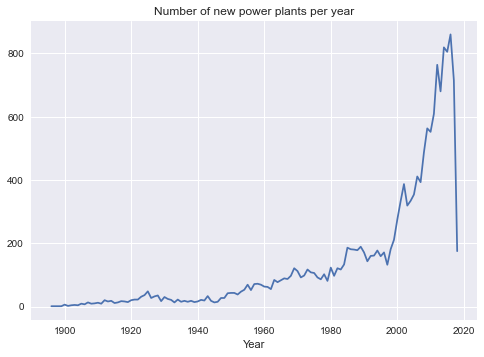

In [20]:
nycountplot = nycount.plot(title = "Number of new power plants per year", xlabel = "Year")

<AxesSubplot:xlabel='Year'>

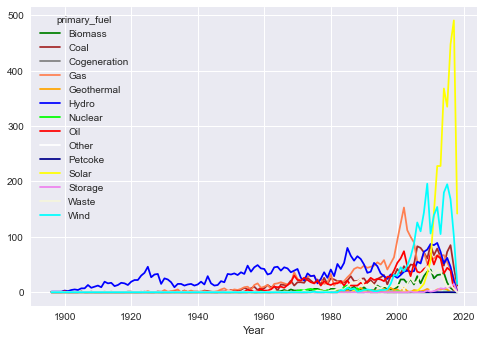

In [100]:
# Exploring which fuel types are responsible for the spikes:

# https://stackoverflow.com/questions/53997862/pandas-groupby-two-columns-and-plot
# https://matplotlib.org/stable/tutorials/colors/colors.html
pd.crosstab(newpp["commissioning_year"],newpp["primary_fuel"]).plot(xlabel = "Year", color = ['green','brown','grey','coral','orange','blue','lime','red','white','darkblue','yellow','violet','beige','cyan'])